# ADQL Query examples

<img style="position: absolute; right: 60px; top: 40px; height: 160px; width: 160px" src="https://datalabs.esa.int/datalab-icon/c11e47af-7ce9-4281-b3b5-475a180a256f" /> 


<div style="width: 70%;">

Copyright (c) European Space Agency, 2025.

This file is subject to the terms and conditions defined in file LICENSE.txt, which is part of this source code package. No part of the package, including this file, may be copied, modified, propagated, or distributed except according to the terms contained in the file LICENSE.txt.

</div>

**Last modified:** 27.11.2025

**Last update:** Align ADQL queries with Euclid Archive schema names.

**Notebook summary**

This notebook includes the ADQL Query examples that are directly accessible from the Euclid Archive WEB interface.

1. To facilitate the navigation through this notebook, only the first 3 lines of the retrieved tables are displayed when the downloaded table contains > 10 rows. This can be easily adjusted or modified below.
2. The ADQL queries are designed to not exceed 1 minute execution time. Currently, most queries are finished in <5 seconds, but their execution time once PDR is public will increase.
3. the ADQL queries are set using the [Python f-string](https://docs.python.org/3/tutorial/inputoutput.html). This approach improves the user experience as it allows to easily modify the optional parts of the query. At the same time, I have tried to not "abuse" of this utility to balance the readibility and interactivity of the examples.

**Some useful links:**
* [Euclid Q1 data product description](https://euclid.esac.esa.int/dr/q1/dpdd/index.html)
* [Astroquery.Euclid documentation content](https://astroquery.readthedocs.io/en/latest/esa/euclid/euclid.html)
* [Astroquery.EuclidClass help content](https://astroquery.readthedocs.io/en/latest/api/astroquery.esa.euclid.EuclidClass.html#astroquery.esa.euclid.EuclidClass)
* [Astropy table documentation](https://docs.astropy.org/en/stable/table/index.html)
* [Gaia Archive: TAP and ADQL](https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries)

**Running the notebook:** This notebook has **read-only permissions**. You can still run and edit cells but if you would like to save your changes then you have to save the notebook to a different location - your workspace for example. The notebook is intended to be run using the **EUCLID-TOOLS kernel** that has all the necessary packages included.

***

In [1]:
# installing necessary packages
from astroquery.esa.euclid.core import Euclid
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import os

In [2]:
def print_query(query):
    ""
    "Convenient method to display ADQL query and print the size - in rows - of the table retrieved from the Archive"
    ""
    print()
    print(query)
    print()
    print(f'* Output table contains {len(res):,} rows')
    print(f'* Displaying first 3 rows: ')
    print()
    return

In [3]:
# making a folder for the output files
output_folder= '/media/user/example_notebook_outputs/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

In [ ]:
Euclid.login()

# Alternative ways to login; uncomment your preferred one: ===========
# Euclid.login_gui()                                          # Login via graphic interface (pop-up window)
# Euclid.login(user='<user name>', password='<password>')     # 
# Euclid.login(credentials_file='<path to credentials file>') # Login using a credentials file - The file must contain just two rows: the user name (first row) and the password.
# Euclid.logout()

INFO: Login to Euclid TAP server: eas.esac.esa.int:443/tap-server/tap/ [astroquery.esa.euclid.core]


## 1. Cone search around NGC 6505 ("Altieri's ring") using a 0.1 degrees radius

Output size (#rows): 15,129

In [6]:
inp_coords = [267.78, 65.53] # RA & Dec - it can be updated as needed
inp_rad    = 0.1             # Cone search radius in degrees - it can be updated as needed

query = f"""SELECT right_ascension, declination, object_id, vis_det, det_quality_flag, flux_detection_total, flux_vis_sersic, flux_y_sersic, flux_j_sersic, flux_h_sersic,
segmentation_map_id, segmentation_area, kron_radius, DISTANCE({inp_coords[0]}, {inp_coords[1]}, right_ascension, declination) AS dist
FROM mer_catalogue
WHERE DISTANCE({inp_coords[0]}, {inp_coords[1]}, right_ascension, declination) < {inp_rad}"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res[0:3]

INFO: Query finished. [astroquery.utils.tap.core]

SELECT right_ascension, declination, object_id, vis_det, det_quality_flag, flux_detection_total, flux_vis_sersic, flux_y_sersic, flux_j_sersic, flux_h_sersic,
segmentation_map_id, segmentation_area, kron_radius, DISTANCE(267.78, 65.53, right_ascension, declination) AS dist
FROM mer_catalogue
WHERE DISTANCE(267.78, 65.53, right_ascension, declination) < 0.1

* Output table contains 15,129 rows
* Displaying first 3 rows: 



right_ascension,declination,object_id,vis_det,det_quality_flag,flux_detection_total,flux_vis_sersic,flux_y_sersic,flux_j_sersic,flux_h_sersic,segmentation_map_id,segmentation_area,kron_radius,dist
float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,int64,int64,float64,float64
267.8007183299202,65.43077069259559,2678007183654307706,1,2,3.303119659423828,3.1258363723754883,8.079318046569824,10.060230255126953,13.103922843933105,102158889039947,257,24.9636173248291,0.09960112595660932
267.81347229955026,65.43376784423499,2678134722654337678,1,0,0.2972785234451294,0.2499639391899109,0.6006065607070923,0.45541542768478394,0.758150041103363,102158889040543,53,18.347612380981445,0.09722946762358776
267.73787120423793,65.43489754122781,2677378712654348975,1,0,0.08075621724128723,0.10290417075157166,0.2827775776386261,0.3062794506549835,0.34649279713630676,102158889040707,14,6.5500030517578125,0.0966959477506201


## 2. Photometric redshift classification in a 0.1 degrees radius centred on NGC 6505 ("Altieri's ring")

Output size (#rows): 15,129

In [7]:
inp_coords = [267.78, 65.53] # RA & Dec - it can be updated as needed
inp_rad    = 0.1             # Cone search radius in degrees - it can be updated as needed

query = f"""SELECT mer.right_ascension, mer.declination, phz_class.*
FROM mer_catalogue AS mer
JOIN phz_classification AS phz_class USING (object_id)
WHERE DISTANCE({inp_coords[0]}, {inp_coords[1]}, mer.right_ascension, mer.declination) < {inp_rad}"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res[0:3]

INFO: Query finished. [astroquery.utils.tap.core]

SELECT mer.right_ascension, mer.declination, phz_class.*
FROM mer_catalogue AS mer
JOIN phz_classification AS phz_class USING (object_id)
WHERE DISTANCE(267.78, 65.53, mer.right_ascension, mer.declination) < 0.1

* Output table contains 15,129 rows
* Displaying first 3 rows: 



right_ascension,declination,basic_download_data_oid,missing_band,qso_threshold,to_be_published,vis_det,object_id,configuration,phz_star_prob,phz_gal_prob,phz_qso_prob,phz_glob_cl_prob,phz_classification,star_threshold,galaxy_threshold,globc_threshold
float64,float64,int64,str54,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64
267.96304971653757,65.59524483872818,23866,--,0.6686867719176105,1,0,2679630497655952448,30,0.24353203177452087,0.4152580797672272,0.3084259331226349,0.0,2,0.5814304686280756,0.22049536645892448,1.0
267.9676479198445,65.58290861750763,23866,--,0.6686867719176105,1,0,2679676479655829086,30,0.018574392423033714,0.9156079888343811,0.12924033403396606,0.0,2,0.5814304686280756,0.22049536645892448,1.0
267.986488097429,65.58168587796155,23866,--,0.6686867719176105,1,0,2679864880655816858,30,0.021157393231987953,0.4121745824813843,0.6074064373970032,0.0,2,0.5814304686280756,0.22049536645892448,1.0


## 3. Count candidate stars in the phz_star_sed catalogue

Output size (#rows): 1

In [8]:
threshold = 0.9             # Probability threshold - it can be updated as needed
inp_table = 'phz_star_sed'  # Target table          - it can be updated as needed

query = f"""SELECT count(*)
FROM {inp_table}
WHERE phz_star_prob > {threshold}"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res

INFO: Query finished. [astroquery.utils.tap.core]

SELECT count(*)
FROM phz_star_sed
WHERE phz_star_prob > 0.9

* Output table contains 1 rows
* Displaying first 3 rows: 



COUNT_ALL
int64
328999


## 4. Select 10 sources with relative spectral redshift error < 10% 

Output size (#rows): 10

In [9]:
threshold = 10.0 # Redshift signal to noise - it can be updated as needed

query = f"""SELECT TOP 10 cat1.right_ascension, cat1.declination, cat1.point_like_prob, cat1.det_quality_flag, cat1.spurious_flag,
cat1.flux_detection_total, cat1.mumax_minus_mag, cat1.vis_det, cat1.flux_vis_2fwhm_aper, cat2.spe_z, cat2.spe_z_err
FROM mer_catalogue as cat1
JOIN spectro_zcatalog_spe_galaxy_candidates AS cat2 USING(object_id)
WHERE cat2.spe_z/cat2.spe_z_err > {threshold}"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res[0:3]

INFO: Query finished. [astroquery.utils.tap.core]

SELECT TOP 10 cat1.right_ascension, cat1.declination, cat1.point_like_prob, cat1.det_quality_flag, cat1.spurious_flag,
cat1.flux_detection_total, cat1.mumax_minus_mag, cat1.vis_det, cat1.flux_vis_2fwhm_aper, cat2.spe_z, cat2.spe_z_err
FROM mer_catalogue as cat1
JOIN spectro_zcatalog_spe_galaxy_candidates AS cat2 USING(object_id)
WHERE cat2.spe_z/cat2.spe_z_err > 10.0

* Output table contains 10 rows
* Displaying first 3 rows: 



right_ascension,declination,point_like_prob,det_quality_flag,spurious_flag,flux_detection_total,mumax_minus_mag,vis_det,flux_vis_2fwhm_aper,spe_z,spe_z_err
float64,float64,float64,int64,int64,float64,float64,int64,float64,float64,float64
53.77462093967527,-27.576818675613467,0.0022804674226790667,0,0,4.207389831542969,-1.0807533264160156,1,2.720780849456787,0.9260096549987793,0.001020485651679337
53.77462093967527,-27.576818675613467,0.0022804674226790667,0,0,4.207389831542969,-1.0807533264160156,1,2.720780849456787,1.5162012577056885,0.000922508945222944
53.77462093967527,-27.576818675613467,0.0022804674226790667,0,0,4.207389831542969,-1.0807533264160156,1,2.720780849456787,0.2579083740711212,0.0007374223205260932


## 5. Select top 20 brightest sources by flux_vis_sersic

Output size (#rows): 20

In [10]:
query = f"""SELECT TOP 20 right_ascension, declination, flux_vis_4fwhm_aper, flux_vis_psf, flux_vis_sersic, flux_detection_total, det_quality_flag, spurious_flag, vis_det
FROM mer_catalogue
WHERE NULLIF(flux_vis_sersic, 'NaN') > 0.0
ORDER BY flux_vis_sersic DESC"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res[0:3]

INFO: Query finished. [astroquery.utils.tap.core]

SELECT TOP 20 right_ascension, declination, flux_vis_4fwhm_aper, flux_vis_psf, flux_vis_sersic, flux_detection_total, det_quality_flag, spurious_flag, vis_det
FROM mer_catalogue
WHERE NULLIF(flux_vis_sersic, 'NaN') > 0.0
ORDER BY flux_vis_sersic DESC

* Output table contains 20 rows
* Displaying first 3 rows: 



right_ascension,declination,flux_vis_4fwhm_aper,flux_vis_psf,flux_vis_sersic,flux_detection_total,det_quality_flag,spurious_flag,vis_det
float64,float64,float64,float64,float64,float64,int64,int64,int64
269.6384206860493,66.63371280343897,165761.546875,410.2769775390625,524987.3125,524965.5625,898,0,1
56.83184245323367,-50.75447754356855,--,--,462965.875,462965.625,394,0,1
269.64082630830296,66.63333314039146,--,--,452177.5,452328.71875,1920,0,0


## 6. Cone search to obtain the spectra (which can be downloaded via DataLink) of objects with 1 < z < 1.1 around a given position

Output size (#rows): 155
Note: this ADQL query contains three fields (datalabs_path, file_name, hdu_index) not included in the ADQL examples available in the WEB interface of the Euclid Archive. These fields are most relevant for users aiming to access the
spectra programmatically and mainly from ESA datalabs.

In [11]:
inp_coords = [75.0, -45.0]   # RA & Dec - it can be updated as needed
inp_rad    = 6.0             # Cone search radius in degrees - it can be updated as needed

query= f"""SELECT spec.ra_obj, spec.dec_obj, spec.source_id, spec.datalabs_path, spec.file_name, spec.hdu_index, phz.phz_median, mer.flux_h_4fwhm_aper
FROM q1.spectra_source AS spec
JOIN phz_photo_z AS phz
  ON spec.source_id = phz.object_id
JOIN mer_catalogue AS mer
  ON spec.source_id = mer.object_id
AND phz.phz_median BETWEEN 1.0 AND 1.1
AND DISTANCE(ra_obj, dec_obj, {inp_coords[0]}, {inp_coords[1]}) < {inp_rad}
ORDER BY ra_obj ASC"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res[0:3]

INFO: Query finished. [astroquery.utils.tap.core]

SELECT spec.ra_obj, spec.dec_obj, spec.source_id, spec.datalabs_path, spec.file_name, spec.hdu_index, phz.phz_median, mer.flux_h_4fwhm_aper
FROM q1.spectra_source AS spec
JOIN phz_photo_z AS phz
  ON spec.source_id = phz.object_id
JOIN mer_catalogue AS mer
  ON spec.source_id = mer.object_id
AND phz.phz_median BETWEEN 1.0 AND 1.1
AND DISTANCE(ra_obj, dec_obj, 75.0, -45.0) < 6.0
ORDER BY ra_obj ASC

* Output table contains 155 rows
* Displaying first 3 rows: 



ra_obj,dec_obj,source_id,datalabs_path,file_name,hdu_index,phz_median,flux_h_4fwhm_aper
float64,float64,int64,str35,str61,int64,float64,float64
66.7048678897113,-46.5969878285092,-667048678465969878,/data/euclid_q1/Q1_R1/SIR/102022982,EUC_SIR_W-COMBSPEC_102022982_2024-11-01T16:05:20.960184Z.fits,1445,1.059999942779541,4.68186092376709
66.7172228661413,-46.6359663129147,-667172228466359663,/data/euclid_q1/Q1_R1/SIR/102022982,EUC_SIR_W-COMBSPEC_102022982_2024-11-01T16:05:10.171991Z.fits,1401,1.0,6.671435356140137
66.7217519274094,-46.6546784378331,-667217519466546784,/data/euclid_q1/Q1_R1/SIR/102022982,EUC_SIR_W-COMBSPEC_102022982_2024-11-01T16:05:06.017957Z.fits,1535,1.0399999618530273,34.7795295715332


### 6.1 Retrieve the spectra of the second source via DataLink


In [12]:
from datetime import datetime as dt
inp_row = 1     # To retrieve the spectra associated to the second row in the output of the query above

inp_source_id = res['source_id'][inp_row]
# dl_out        = Euclid.get_spectrum(source_id=f"{inp_source_id}", retrieval_type = "SPECTRA_RGS",  output_file = output_folder + "/spectra_" + dt.now().strftime('%Y-%m-%d_%H:%M:%S') + "/temp.fits.zip", verbose = True) # Example showing how to store the spectra in other directory.
dl_out        = Euclid.get_spectrum(source_id=f"{inp_source_id}", retrieval_type = "SPECTRA_RGS", verbose = True)
print()
print(f'Spectra downloaded and saved in: {dl_out[0]}')

Retrieving data.
Data request: ID=sedm+-667172228466359663&SCHEMA=sedm&RETRIEVAL_TYPE=SPECTRA_RGS&USE_ZIP_ALWAYS=true&TAPCLIENT=ASTROQUERY
------>https
host = eas.esac.esa.int:443
context = /sas-dd/data
Content-type = application/x-www-form-urlencoded
200 
Reading...
Done.

Spectra downloaded and saved in: /media/user/temp_20251127_104030/SPECTRA_RGS-sedm -667172228466359663.fits


In [13]:
spec_dl = fits.open(dl_out[0]) # This contains two HDUs, we are interested in the 2nd one.
spec_dl = spec_dl[1]
spec_dl.header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   22 / width of table in bytes                        
NAXIS2  =                  531 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'WAVELENGTH'         / label for field   1                            
TFORM1  = '1E      '           / data format of field: 4-byte REAL              
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'SIGNAL  '           / label for field   2                            
TFORM2  = '1E      '        

### 6.2 Retrieve the spectra of the first source_id from the FITS files stored in Datalabs

To that end we use the information included in the "datalabs_path", "file_name", and "hdu_index" fields.

In [14]:
fits_file_path = res[inp_row]['datalabs_path'] + '/' + res[inp_row]['file_name']
hdu            = res[inp_row]['hdu_index']

temp = fits.open(fits_file_path) # This contains two HDUs, we are interested in the 2nd one.
print(f'* Reading {fits_file_path}: {len(temp):,} HDUs found')
print(f'* Extracting spectra associated to HDU = {hdu}')
print()

spec_datalabs  = temp[hdu]
spec_datalabs.header

* Reading /data/euclid_q1/Q1_R1/SIR/102022982/EUC_SIR_W-COMBSPEC_102022982_2024-11-01T16:05:10.171991Z.fits: 2,279 HDUs found
* Extracting spectra associated to HDU = 1401



XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   22 / width of table in bytes                        
NAXIS2  =                  531 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    6 / number of fields in each row                   
TTYPE1  = 'WAVELENGTH'         / label for field   1                            
TFORM1  = '1E      '           / data format of field: 4-byte REAL              
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'SIGNAL  '           / label for field   2                            
TFORM2  = '1E      '        

### 6.3 Plot both spectra

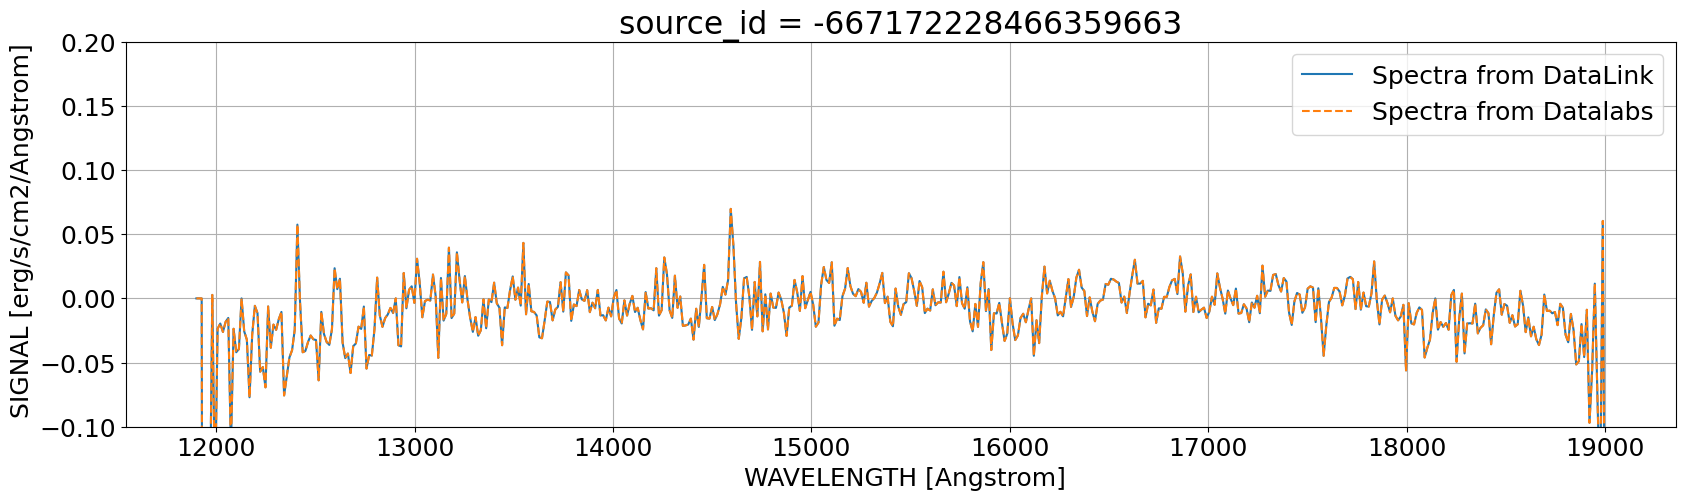

In [15]:
fontsize = 18
fig      = plt.figure(figsize=[20,5])
plt.title(f'source_id = {inp_source_id}', fontsize = fontsize*1.25)
plt.plot(spec_dl.data['WAVELENGTH'],       spec_dl.data['SIGNAL'],       label = 'Spectra from DataLink')
plt.plot(spec_datalabs.data['WAVELENGTH'], spec_datalabs.data['SIGNAL'], label = 'Spectra from Datalabs', linestyle = '--')

plt.legend(fontsize = fontsize)
plt.grid()
plt.ylim([-0.1,0.2])
plt.xlabel(f" WAVELENGTH [{spec_dl.header['TUNIT1']}]" , fontsize = fontsize)
plt.ylabel(f" SIGNAL [{spec_dl.header['TUNIT2']}]" , fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.show()

## 7. Get mosaic information (like tile_index) for the VIS observations that include a selected target by coordinates

Output size (#rows): 3

In [16]:
inp_coords = [267.78, 65.53] # RA & Dec - it can be updated as needed
inp_rad    = 0.5             # Cone search radius in degrees - it can be updated as needed

query = f"""SELECT *, DISTANCE(ra, dec, {inp_coords[0]}, {inp_coords[1]}) AS dist
FROM q1.mosaic_product
WHERE DISTANCE({inp_coords[0]}, {inp_coords[1]}, ra, dec) < {inp_rad}
AND instrument_name = 'VIS'"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res

INFO: Query finished. [astroquery.utils.tap.core]

SELECT *, DISTANCE(ra, dec, 267.78, 65.53) AS dist
FROM q1.mosaic_product
WHERE DISTANCE(267.78, 65.53, ra, dec) < 0.5
AND instrument_name = 'VIS'

* Output table contains 3 rows
* Displaying first 3 rows: 



category,checksum,creation_date,crpix1,crpix2,crval1,crval2,datalabs_path,data_release_oid,data_size,dec,file_name,file_path,filter_name,first_type,fov,instrument_name,mosaic_product_oid,patch_id_list,product_id,product_type,provenance_id,published,ra,release_date,release_name,second_type,stc_s,technique,tile_index,to_be_published,zero_point,zero_point_error,dist
str7,str32,str23,float64,float64,float64,float64,str39,int64,float64,float64,str80,str51,str3,str3,str153,str3,int64,int64,str110,str15,int64,int64,float64,int64,str5,str3,str161,str5,int64,int64,float64,float64,float64
SCIENCE,36ca4ab532a46e29e2afc1a2927b1502,2024-10-26T00:02:28.889,9600.0,9600.0,267.6677326,66.0,/data/euclid_q1/Q1_R1/MER/102159190/VIS,1,-32.0,66.0,EUC_MER_BGSUB-MOSAIC-VIS_TILE102159190-6E6EF8_20241025T010045.358775Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102159190/VIS,VIS,STD,"(268.3164801839071, 65.7319868835704, 267.01891743695654, 65.73198659683939, 267.0052112445985, 66.26525338744666, 268.33018494891104, 66.26525368145022)",VIS,2260,49,MER_ProcessTile_EUCLID_2.0.2-QUICK_RELEASE-glibet-PLAN-000003-MTFDNLIH-20241024-174840-61-compressed_mosaics-0,DpdMerBksMosaic,5,0,267.6677326,--,Q1_R1,SKY,Polygon J2000 268.31648018390734 65.73198688357043 267.01891743695654 65.73198659683952 267.00521124459834 66.26525338744648 268.33018494891104 66.26525368145018,IMAGE,102159190,1,24.6,0.1,0.4722536433950644
SCIENCE,e85b41d774e5c3f2d6b7190e4908266c,2024-10-26T02:27:42.475,9600.0,9600.0,268.5638797,65.5,/data/euclid_q1/Q1_R1/MER/102158890/VIS,1,-32.0,65.5,EUC_MER_BGSUB-MOSAIC-VIS_TILE102158890-A009F7_20241025T033856.531554Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158890/VIS,VIS,STD,"(269.2003326258326, 65.23201832676949, 267.92736047553643, 65.2320180465897, 267.914226922229, 65.76528616417983, 269.21346481140546, 65.765286451356)",VIS,2498,49,MER_ProcessTile_EUCLID_2.0.2-QUICK_RELEASE-glibet-PLAN-000003-G86WZ5QR-20241024-174840-49-compressed_mosaics-0,DpdMerBksMosaic,5,0,268.5638797,--,Q1_R1,SKY,Polygon J2000 269.2003326258323 65.23201832676932 267.9273604755362 65.23201804658949 267.91422692222915 65.76528616418001 269.2134648114055 65.76528645135625,IMAGE,102158890,1,24.6,0.1,0.3262628896197043
SCIENCE,7ea902effed19bf370bbdeb76cd5d99b,2024-10-26T12:57:21.177,9600.0,9720.0,267.3807789,65.4983,/data/euclid_q1/Q1_R1/MER/102158889/VIS,1,-32.0,65.4983,EUC_MER_BGSUB-MOSAIC-VIS_TILE102158889-F95D3B_20241025T024806.508980Z_00.00.fits,/euclid/repository_idr/iqr1/Q1_R1/MER/102158889/VIS,VIS,STD,"(268.01711050138965, 65.22698537773368, 266.74438101261455, 65.22698509761862, 266.7310851576081, 65.76691932015984, 268.0304049717605, 65.7669196073578)",VIS,1963,49,MER_ProcessTile_EUCLID_2.0.2-QUICK_RELEASE-glibet-PLAN-000003-UJ5F2ZOF-20241024-174840-48-compressed_mosaics-0,DpdMerBksMosaic,5,0,267.3807789,--,Q1_R1,SKY,Polygon J2000 268.01711050138994 65.22698537773358 266.7443810126148 65.22698509761858 266.73108515760794 65.76691932015997 268.03040497176073 65.76691960735793,IMAGE,102158889,1,24.6,0.1,0.1684734751975338


## 8. Photometric object classification for the sources that are likely galaxies detected in tile_index = 102158889

Output size (#rows): 48,211

In [17]:
tile_index = 102158889   # Tile index - it can be updated as needed
threshold  = 0.8         # Cone search radius in degrees - it can be updated as needed


query = f"""SELECT mer_cat.right_ascension, mer_cat.declination, mer_cat.segmentation_map_id, phz_class.object_id, phz_class.phz_star_prob, phz_class.phz_gal_prob, phz_class.phz_qso_prob
FROM mer_catalogue AS mer_cat
JOIN phz_classification AS phz_class USING (object_id)
WHERE mer_cat.segmentation_map_id / 1000000 = {tile_index} AND phz_class.phz_gal_prob > {threshold}
ORDER BY phz_class.phz_gal_prob DESC"""

job = Euclid.launch_job_async(query)
res = job.get_results()
print_query(query)
res[0:3]

INFO: Query finished. [astroquery.utils.tap.core]

SELECT mer_cat.right_ascension, mer_cat.declination, mer_cat.segmentation_map_id, phz_class.object_id, phz_class.phz_star_prob, phz_class.phz_gal_prob, phz_class.phz_qso_prob
FROM mer_catalogue AS mer_cat
JOIN phz_classification AS phz_class USING (object_id)
WHERE mer_cat.segmentation_map_id / 1000000 = 102158889 AND phz_class.phz_gal_prob > 0.8
ORDER BY phz_class.phz_gal_prob DESC

* Output table contains 48,211 rows
* Displaying first 3 rows: 



right_ascension,declination,segmentation_map_id,object_id,phz_star_prob,phz_gal_prob,phz_qso_prob
float64,float64,int64,int64,float64,float64,float64
267.0494003738635,65.42513695491766,102158889038866,2670494003654251369,0.0036846355069428682,0.974372923374176,0.013928661122918129
267.90565528915926,65.30418404902605,102158889015074,2679056552653041840,0.0029265524353832006,0.9740169048309326,0.013928661122918129
267.71898144580143,65.59057306475077,102158889071382,2677189814655905730,0.003204202279448509,0.9739913940429688,0.01398712769150734
